Proyecto Final
==============

### Tratamiento de Datos
### Máster de Ing. de Telecomunicación

# Autores

Juan Manuel Espinosa Moral ([100406523@alumnos.uc3m.es](mailto:100406523@alumnos.uc3m.es))

José Manuel García Núñez ([100544621@alumnos.uc3m.es](mailto:100544621@alumnos.uc3m.es))

In [2]:
# Google Drive integration

# Libraries to work with Google Drive and the file system
from google.colab import drive
import os, sys

# Drive is mounted
drive.mount("/content/drive")

# Current directory is shown
print(os.getcwd())

# We change to work directory
directory_path = "/content/drive/MyDrive/Colab Notebooks/proyecto_td/"  # Define directory_path here
if not os.path.exists(directory_path):
  os.makedirs(directory_path)
  print(f"Directory created: {directory_path}")

os.chdir(directory_path) # Now change to the directory

Mounted at /content/drive
/content


# 1. Análisis de Variables de Entrada
Carga del dataset: datos del archivo JSON.
Categorías: las más frecuentes.
Rating y visualizaciones.
Análisis de correlación: categorias y variables de salida.

Categorías más frecuentes:
 categories
Bon Appétit      9355
Peanut Free      8390
Soy Free         8088
Tree Nut Free    7044
Vegetarian       6846
Name: count, dtype: int64


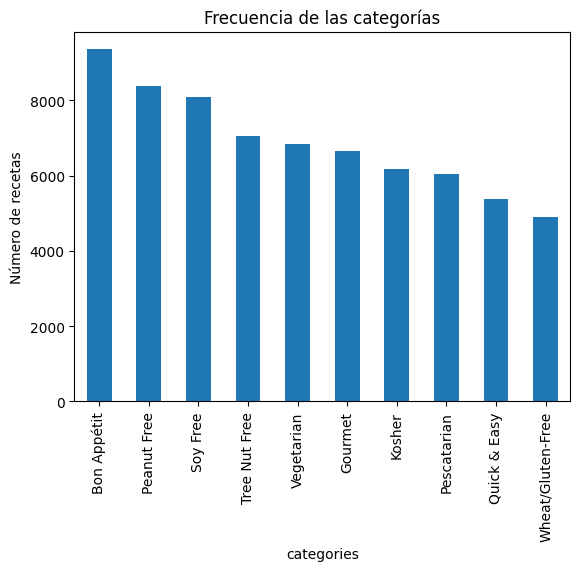

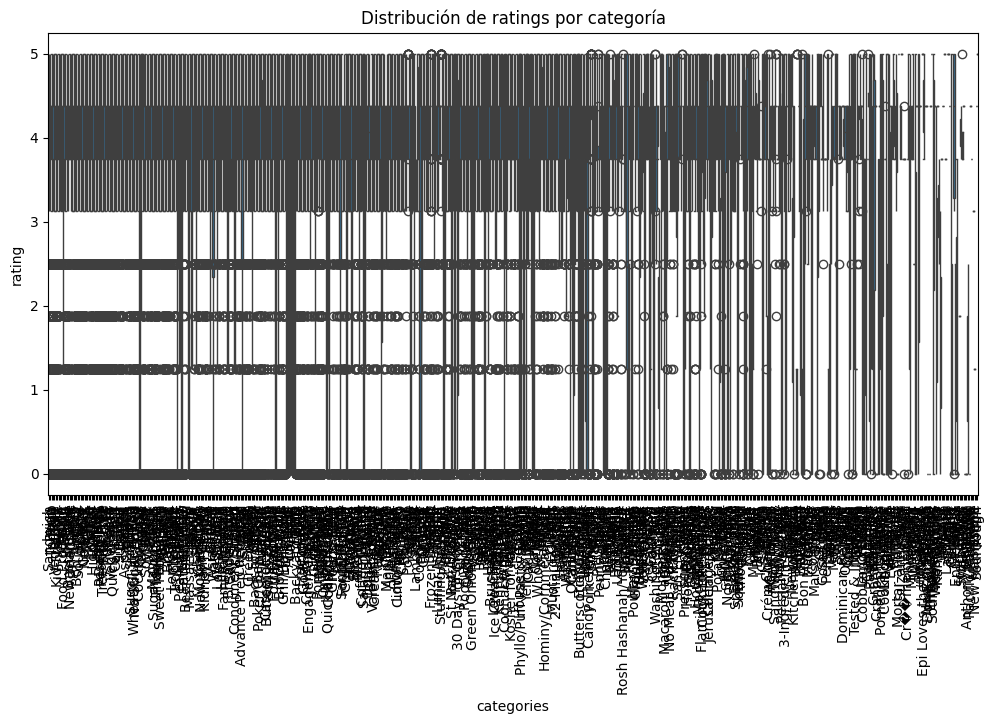

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo JSON
df = pd.read_json("full_format_recipes.json")

# Explorar las categorías más frecuentes
category_counts = df['categories'].explode().value_counts()
print("Categorías más frecuentes:\n", category_counts.head())

# Visualizar las categorías más frecuentes
category_counts.head(10).plot(kind='bar', title="Frecuencia de las categorías")
plt.ylabel("Número de recetas")
plt.show()

# Analizar la relación entre categorías y ratings
df_exploded = df.explode('categories')  # Expandir listas de categorías
# Reset the index to avoid duplicate index values
df_exploded = df_exploded.reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='rating', data=df_exploded)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría")
plt.show()


Categorías más frecuentes:
 categories
Bon Appétit      9355
Peanut Free      8390
Soy Free         8088
Tree Nut Free    7044
Vegetarian       6846
Name: count, dtype: int64


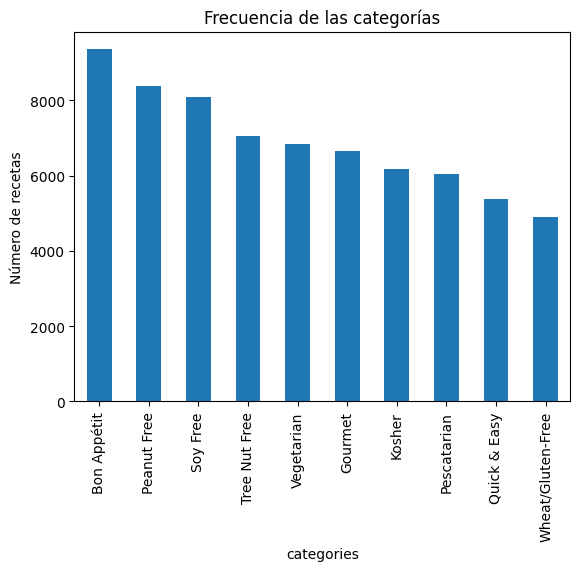

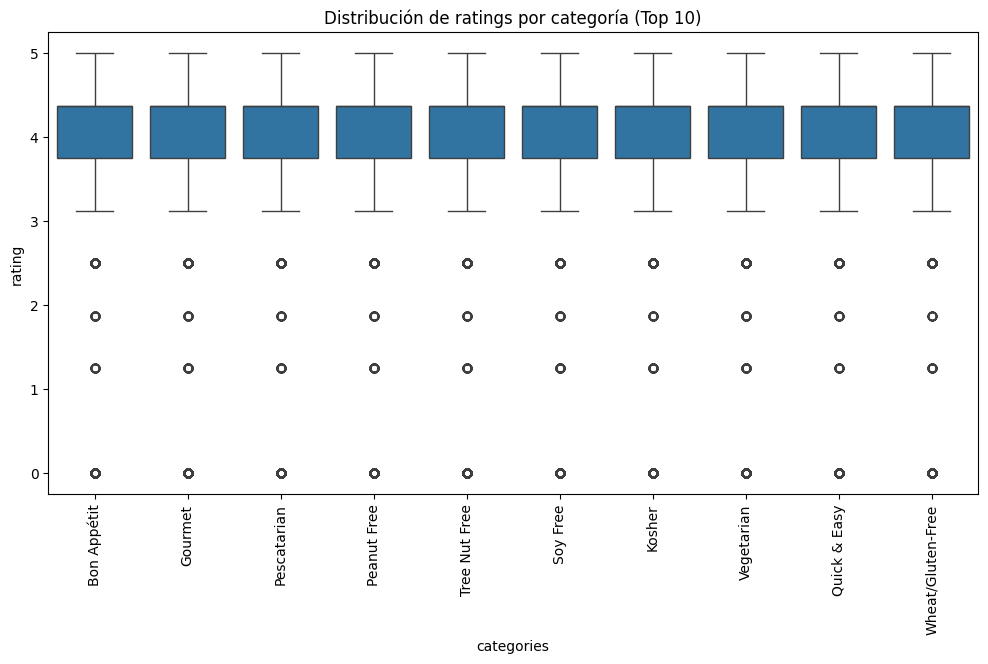

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo JSON
df = pd.read_json("full_format_recipes.json")

# Explorar las categorías más frecuentes
category_counts = df['categories'].explode().value_counts()
print("Categorías más frecuentes:\n", category_counts.head())

# Visualizar las categorías más frecuentes
category_counts.head(10).plot(kind='bar', title="Frecuencia de las categorías")
plt.ylabel("Número de recetas")
plt.show()

# Analizar la relación entre categorías y ratings, filtrando por las más frecuentes
df_exploded = df.explode('categories')  # Expandir listas de categorías
df_exploded = df_exploded.reset_index(drop=True)  # Resetear el índice

# Filtrar por las 10 categorías más frecuentes
top_categories = category_counts.head(10).index.tolist()
df_filtered = df_exploded[df_exploded['categories'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría (Top 10)")
plt.show()

               fat   protein  calories    sodium    rating
fat       1.000000  0.712194  0.996538  0.986476  0.007235
protein   0.712194  1.000000  0.742816  0.749287  0.013972
calories  0.996538  0.742816  1.000000  0.996392  0.007882
sodium    0.986476  0.749287  0.996392  1.000000  0.008179
rating    0.007235  0.013972  0.007882  0.008179  1.000000


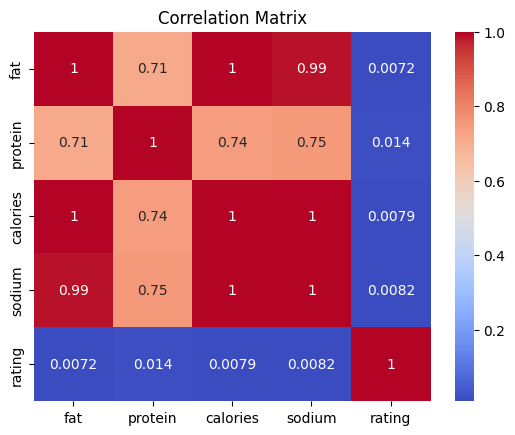

In [6]:
# Assuming 'df' is your DataFrame
correlation = df[['fat', 'protein', 'calories', 'sodium', 'rating']].corr()

print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

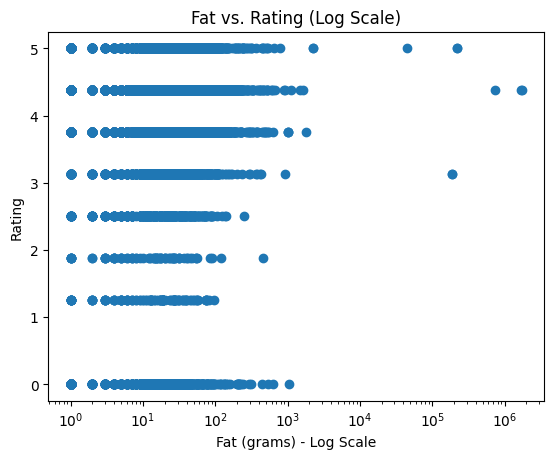

In [15]:
import matplotlib.pyplot as plt


plt.scatter(df['fat'], df['rating'])
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.xlabel('Fat (grams) - Log Scale')
plt.ylabel('Rating')
plt.title('Fat vs. Rating (Log Scale)')
plt.show()

<ipython-input-10-211975479a60>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = df.groupby('calorie_bins')['rating'].mean()


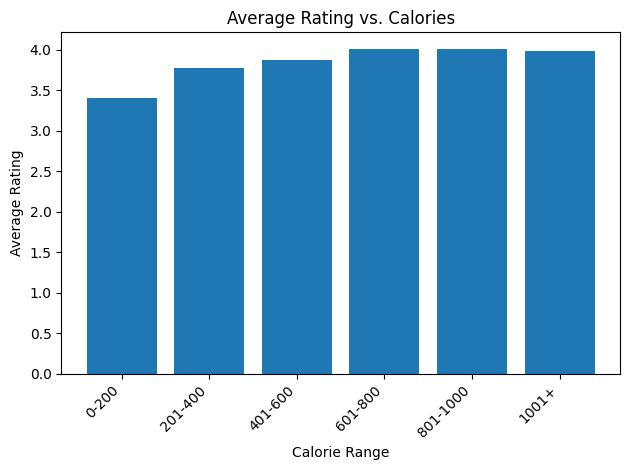

In [10]:
# Define the bins for calories
bins = [0, 200, 400, 600, 800, 1000, float('inf')]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001+']

# Create a new column with the calorie bins
df['calorie_bins'] = pd.cut(df['calories'], bins=bins, labels=labels)

average_ratings = df.groupby('calorie_bins')['rating'].mean()

import matplotlib.pyplot as plt

plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Calorie Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Calories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-13-45b7ed4c0721>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = df.groupby('fat_bins')['rating'].mean()


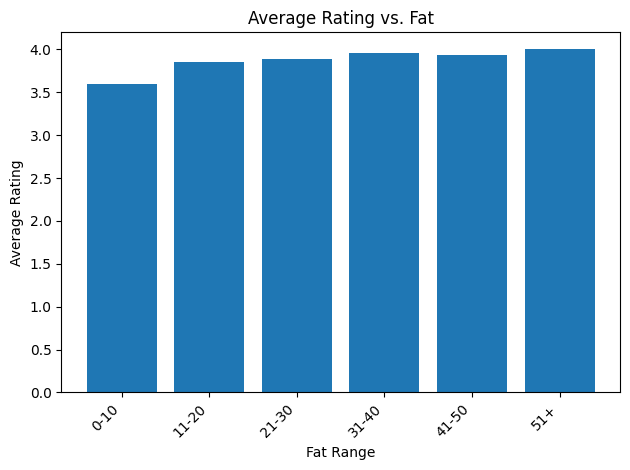

In [13]:
# Create a new column with the calorie bins
bins_fat = [0, 10, 20, 30, 40, 50, float('inf')]
labels_fat = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

df['fat_bins'] = pd.cut(df['fat'], bins=bins_fat, labels=labels_fat)

average_ratings = df.groupby('fat_bins')['rating'].mean()

plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Fat Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Fat')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-14-cc9b3100a35e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = df.groupby('protein_bins')['rating'].mean()


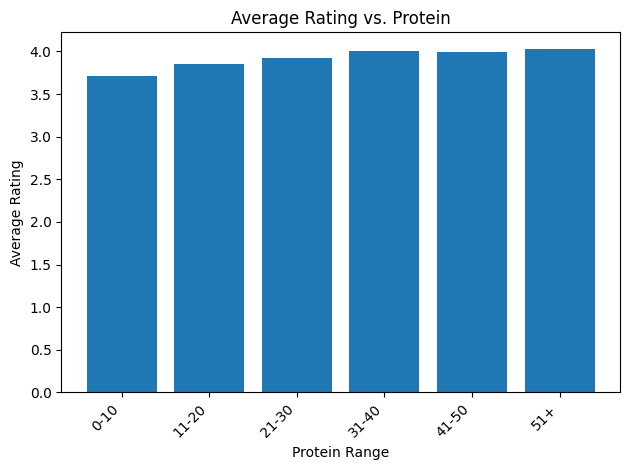

In [14]:
# Create a new column with the calorie bins
bins_protein = [0, 10, 20, 30, 40, 50, float('inf')]
labels_protein = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

df['protein_bins'] = pd.cut(df['protein'], bins=bins_protein, labels=labels_protein)

average_ratings = df.groupby('protein_bins')['rating'].mean()

plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Protein Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Protein')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

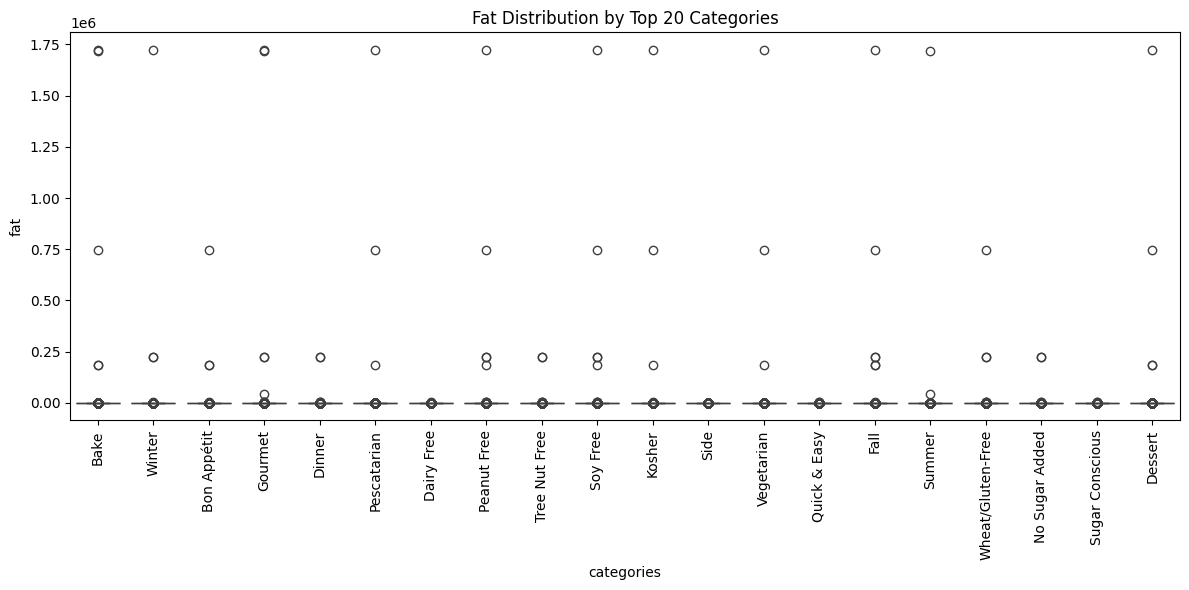

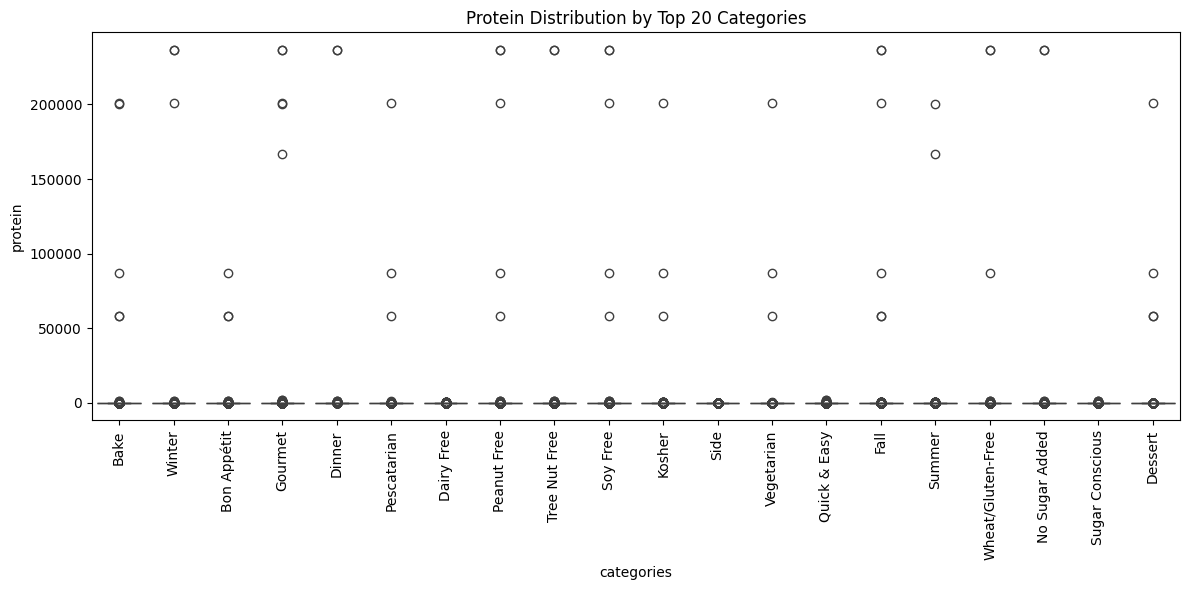

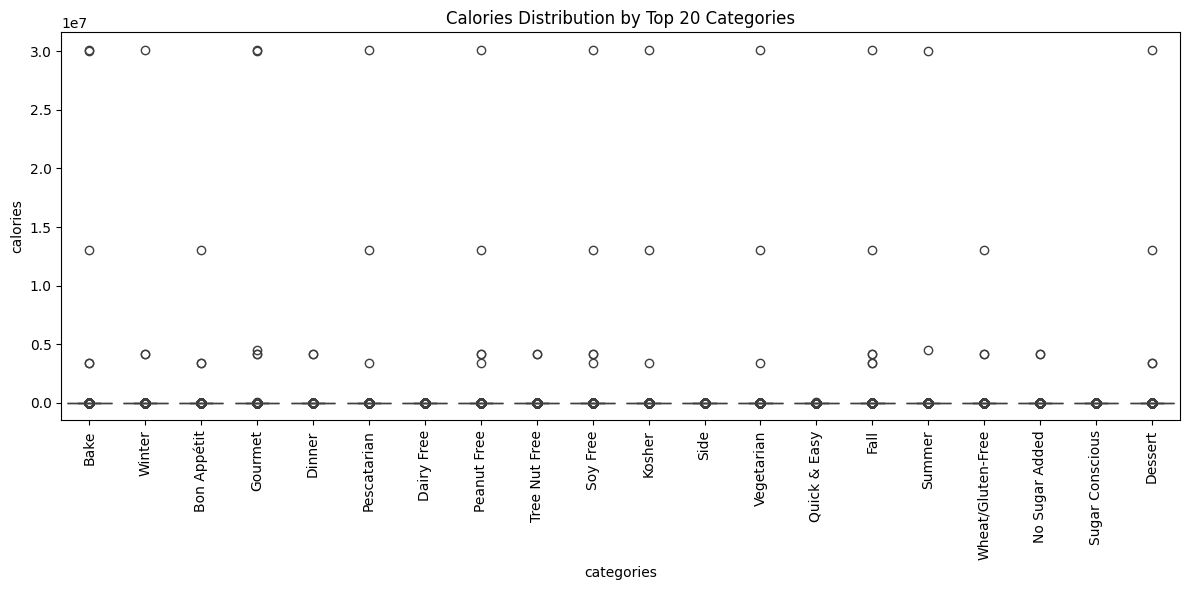

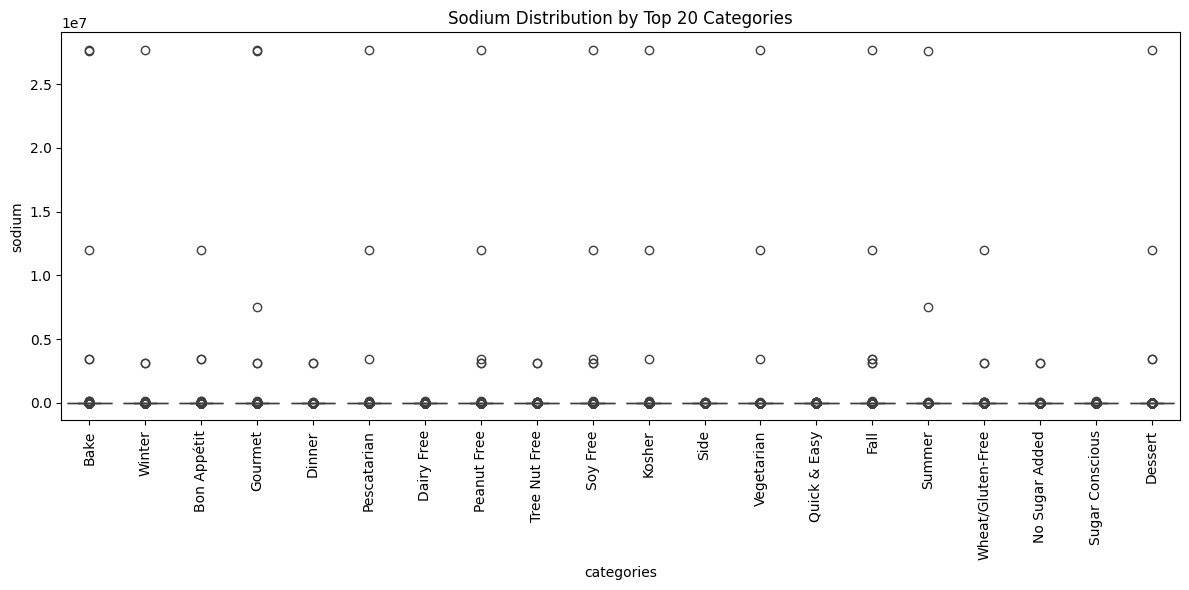

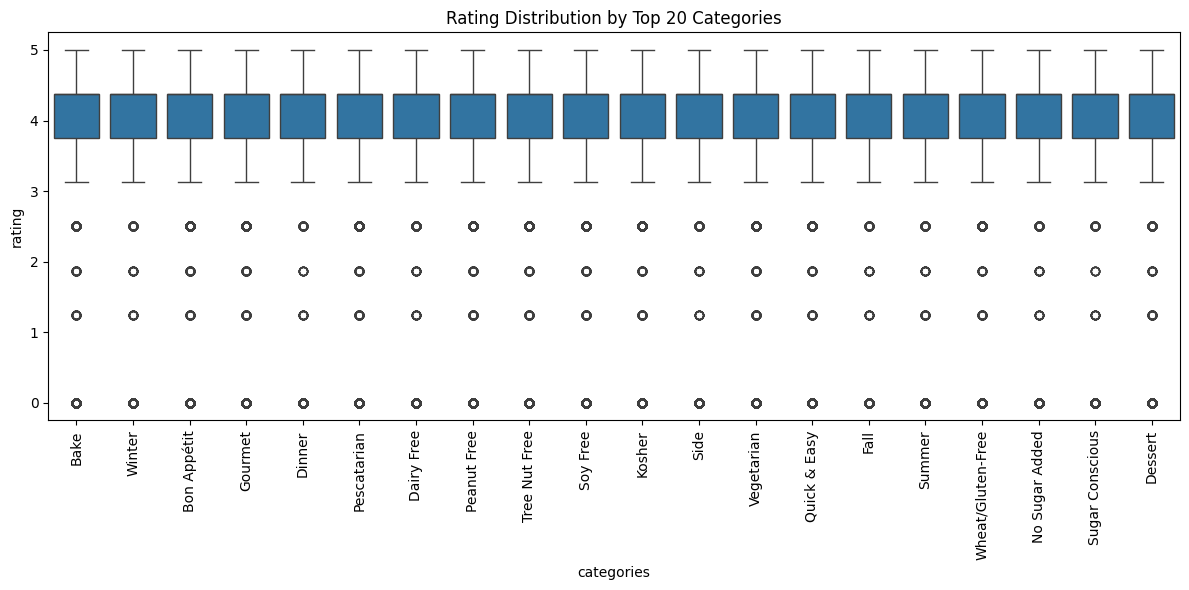

In [17]:
top_20_categories = df_exploded['categories'].value_counts().head(20).index.tolist()
df_filtered = df_exploded[df_exploded['categories'].isin(top_20_categories)]

variables = ['fat', 'protein', 'calories', 'sodium', 'rating']
for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='categories', y=variable, data=df_filtered)
    plt.xticks(rotation=90)
    plt.title(f'{variable.capitalize()} Distribution by Top 20 Categories')
    plt.tight_layout()
    plt.show()

In [23]:
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
  """Preprocesa un texto dado.

  Args:
    text: El texto a preprocesar.

  Returns:
    El texto preprocesado.
  """

  # 1. Convertir a minúsculas
  text = text.lower()

  # 2. Eliminar caracteres especiales y números
  text = re.sub(r"[^a-zA-Z]", " ", text)

  # 3. Tokenizar
  tokens = word_tokenize(text)

  # 4. Eliminar stop words
  stop_words = set(stopwords.words('spanish'))
  tokens = [w for w in tokens if not w in stop_words]

  # 5. Unir los tokens de nuevo en una cadena
  processed_text = " ".join(tokens)

  return processed_text

# Ejemplo de uso
text = "Este es un ejemplo de texto con caracteres especiales y números (123)."
processed_text = preprocess_text(text)
print(processed_text)  # Salida: ejemplo texto caracteres especiales numeros

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
